<img src="https://data.inpe.br/big/web/wp-content/uploads/2024/05/logo-BIG-INPE.svg" align="right" width="100"/>>

# <span style="color:#336699">BIG Love Data Day - Acesso e Processamento de Imagens GOES utilizando STAC e Python para Análise de Topos de Nuvens Associadas à Precipitação no Estado do RS</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Douglas Uba<br/><br/>
    DISSM -  Divisão de Satélites e Sensores Meteorológicos
    <br/>
    CGCT - Coordenação-Geral de Ciências da Terra
    <br/>
    INPE - Instituto Nacional de Pesquisas Espaciais, Brasil.
    <br/>
    Contato: <a href="mailto:douglas.uba@inpe.br">douglas.uba@inpe.br</a>
    <br/><br/>
    Última Atualização: 28 de Maio de 2025
</div>

<br/>

<div style="text-align: justify; margin-left: 25%; margin-right: 25%;"> <b>Resumo</b> — Este Jupyter Notebook mostra como acessar imagens do satélite GOES usando o serviço STAC, em conjunto com ferramentas de processamento e visualização em Python. O foco está na utilização do Canal 13, que permite observar topos de nuvens muito frias, geralmente associados a chuvas intensas. Como exemplo, é analisado o <b>evento extremo de precipitação</b> que atingiu o estado do Rio Grande do Sul - RS entre os dias <b>29 de abril e 4 de maio de 2024</b>. </div>

## 🛰️ GOES/ABI - Canais Espectrais

A tabela abaixo apresenta as características principais do imageador ABI (*Advanced Baseline Imager*) que integra os satélites da Série GOES-R. Neste notebook, vamos utilizar o **Canal 13 (10.3μm)**, amplamente utilizado para indetificação de sistemas convectivos e precipitação, *i.e.* aplicações de monitoramento de sistemas meteorológicos.

| Canal | Comprimento de Onda (μm) | Nome Comum | Principais Aplicações | Resolução Espacial (km) |
|-------|--------------------------|------------|----------------------|-------------------------|
| 01 | 0.47 | Azul (Blue) | Detecção de aerossóis, qualidade do ar, vegetação | 1 |
| 02 | 0.64 | Vermelho (Red) | Mapeamento de nuvens, limites terrestres, vegetação | 0.5 |
| 03 | 0.86 | Próximo ao Infravermelho (Near-IR) | Detecção de neve/gelo, características da superfície terrestre | 1 |
| 04 | 1.37 | Cirrus | Detecção de nuvens cirrus, vapor de água na alta atmosfera | 2 |
| 05 | 1.6 | Infravermelho Próximo (Near-IR) | Distinguir gelo e água em nuvens, propriedades de nuvens | 1 |
| 06 | 2.2 | Infravermelho de Ondas Curtas (SWIR) | Detecção de umidade de vegetação, características do solo | 2 |
| 07 | 3.9 | Infravermelho de Ondas Curtas (SWIR) | Detecção de incêndios | 2|
| 08 | 6.2 | Vapor de Água | Umidade atmosférica, movimento de sistemas meteorológicos | 2 |
| 09 | 7.3 | Vapor de Água | Umidade atmosférica em diferentes altitudes | 2 |
| 10 | 7.6 | Vapor de Água | Movimentos de massas de ar, sistemas meteorológicos | 2 |
| 11 | 8.4 | Infravermelho (IR) | Temperatura do topo das nuvens, identificação de sistemas | 2 |
| 12 | 9.7 | Infravermelho (IR) | Temperatura atmosférica, identificação de sistemas | 2 |
| **13** | **10.3** | **Infravermelho (IR)** | **🌧️ Temperatura do topo das nuvens, identificação de sistemas convectivos** | 2 |
| 14 | 11.2 | Infravermelho (IR) | Temperatura da superfície terrestre e marítima | 2 |
| 15 | 12.3 | Infravermelho (IR) | Temperatura atmosférica, características de nuvens | 2 |
| 16 | 13.3 | Infravermelho (IR) | Alturas de nuvens, temperatura atmosférica | 2 |

## 👩🏽‍💻 STAC Client API
<hr style="border:1px solid #0077b9;">

Para execução dos exemplos deste Jupyter Notebook, será instalado o pacote [pystac-client](https://pystac-client.readthedocs.io/en/latest/).

In [ ]:
# Não necessário no ambiente do BDC-Lab
#!pip install pystac-client

Para acessar as funcionalidades, importa-se o pacote `pystac_client`:

In [ ]:
import pystac_client
pystac_client.__version__

Em seguida, realiza-se a conexão com o serviço STAC BDC/BIG:

In [ ]:
service = pystac_client.Client.open(
    'https://data.inpe.br/bdc/stac/v1/'
)
service

# 🌧️ Chuvas Intensas - RS
<hr style="border:1px solid #0077b9;">

O **"Evento Extremo de Precipitação no Rio Grande do Sul"** ocorreu entre os dias **29 de abril e 4 de maio de 2024**. Foi marcado por volumes excepcionais de chuva em grande parte do estado, resultando em inundações severas, deslizamentos de terra e danos generalizados em áreas urbanas e rurais. O acumulado de precipitação ultrapassou **400 mm** em algumas localidades, sendo um dos eventos mais significativos já registrados no Brasil. Os desastres afetaram mais de 2 milhões de pessoas e provocaram a morte de mais de 170.

📰 [Chuva Extrema RS](https://www.google.com/search?q=chuva+extrema+rio+grande+do+sul+abril+maio+2024&tbm=nws)

O INMET registrou para o mês de Maio um total de `617,1 mm`, o que indicou uma chuva acima da média no valor de `480,5 mm`. Em adição, a estação pluviômétrica do CEMADEN localizada em Santa Maria (RS) registrou **236 mm** no dia 30 de abril. 

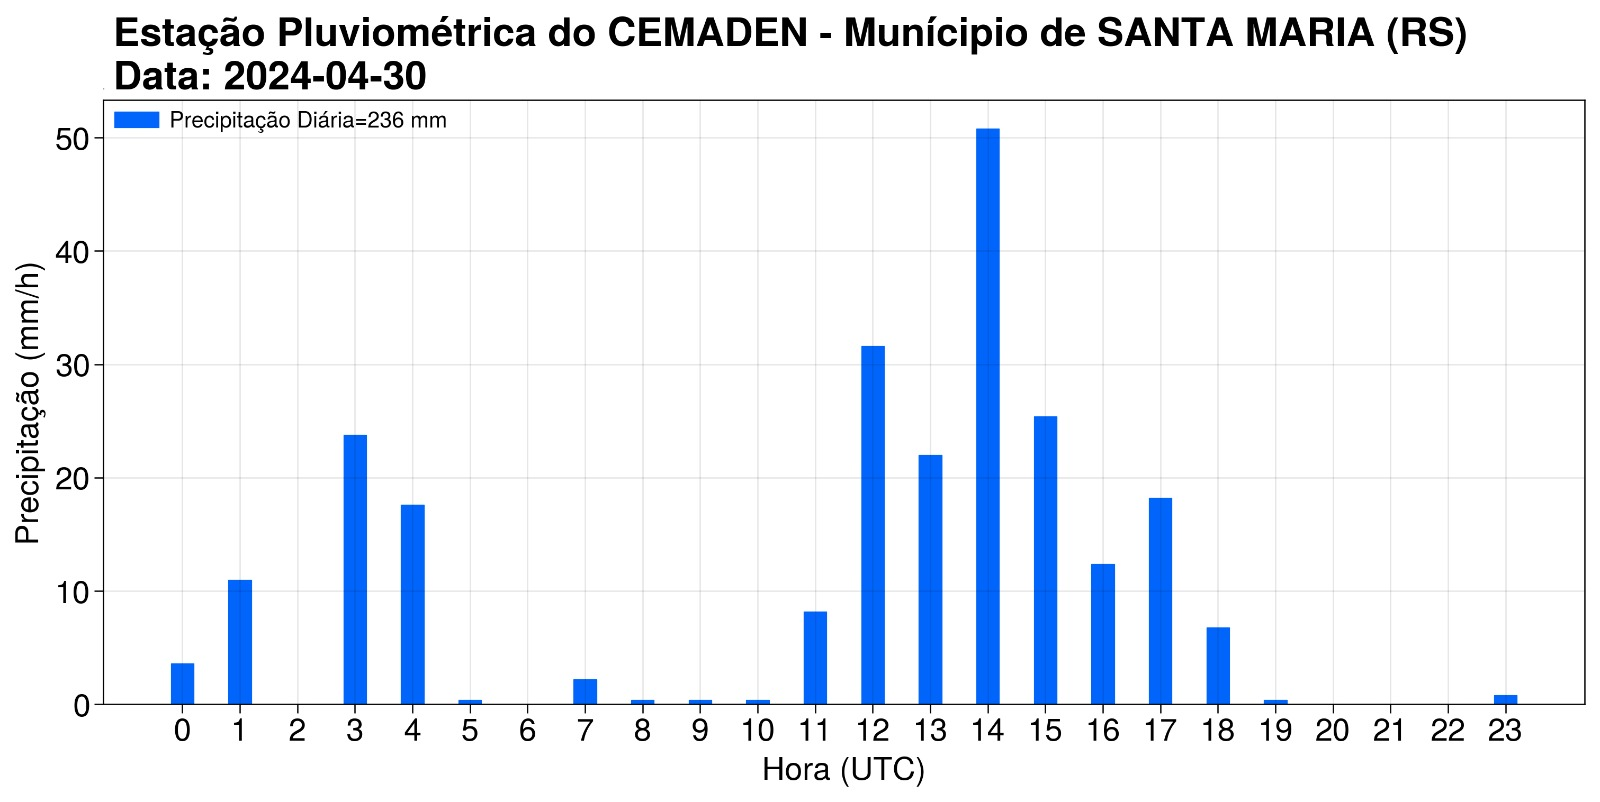

Vamos explorar imagens desse período, utilizando o **Canal 13 - 10.3 µm**. Este canal espectral é amplamente utilizado para a **detecção e monitoramento de sistemas convectivos**, pois é sensível à radiação emitida pelo topo das nuvens. *i.e.* em situações de forte convecção, como neste evento, as nuvens se desenvolvem verticalmente e alcançam altitudes elevadas, emitindo menos radiação infravermelha, o que resulta em temperaturas de brilho muito baixas, facilitando a identificação das áreas com maior potencial para precipitação intensa.


## 🔍 Recuperando as Imagens do dia 30/04/2024 - [12-17h UTC]
<hr style="border:1px solid #0077b9;">

Utilizando o serviço STAC e a partir do método `search`, faremos a recuperação de `Items` da coleção `GOES16-L2-CMI-1`. Vamos utilizar o parâmetro `datetime` para **restringir o período temporal de interesse**: `2024-04-30 12:00 UTC / 2024-04-30 17:00 UTC`, intervalo em que o evento que estamos interessados em analisar teve grande intensidade (de acordo com os dados da estação pluviométrica). Ordenamos os `Items` por data, de modo ascendente (*i.e.* do mais antigo para o mais recente), de modo seguir a evolução temporal natural dos eventos.

In [ ]:
# Search GOES-16 Items by date time. "Chuvas Intenwas - RS", 30/04/2024 [12-17UTC]
item_search = service.search(
    collections=['GOES16-L2-CMI-1'],
    datetime='2024-04-30T12:00:00Z/2024-04-30T17:00:00Z', # <== desired date
    sortby=[{
        'field': 'properties.datetime',
        'direction': 'asc' # <== ascendant order
    }]
)

Verificando o número de `Items` recuperados no período (*i.e.* 5 horas), temos no total 31 itens.

In [ ]:
item_search.matched()

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> Ou seja, temos 6 scans por hora (com intervalo de 10 minutos entre cada scan).<br/>5 horas x 6 scans/hora = 30 Items, + 1 Item das 17h = 31 Items. 🤓
</div>

Na sequência, construímos uma lista com todos os `Items` que foram recuperados:

In [ ]:
items = list(item_search.items())

Visualizando as informações do primeiro `Item`:

In [ ]:
items[0]

Para cada `Item`, temos a imagem (`Asset`) de interesse (`B13`), que usaremos para as análises das nuvens e precipitação.

In [ ]:
for item in items:
    print(item.properties['datetime'], '->', item.assets['B13'].href)

As imagens do GOES-16 são fornecidas no formato [**Network Common Data Form (NetCDF)**](https://www.unidata.ucar.edu/software/netcdf/), amplamente utilizado para armazenar dados científicos multidimensionais, como variáveis climáticas e ambientais. Sendo assim, utilizaremos a biblioteca `netCDF4` para ler os as informações das imagens.

In [ ]:
# Não necessário no ambiente do BDC-Lab
#!pip install netcdf4

## 🗺️ Método Avançado para Visualização das Imagens
<hr style="border:1px solid #0077b9;">

De modo a facilitar as próximas análises, definimos aqui um método denominado `visualize`.

Este método tem a capacidade de realizar a visualização geolocalizada de um dado `Item`, em conjunto com uma série de parâmetros de configuração, que incluem por exemplo:
- área de intresse a ser visualizada - `view_extent`;
- valores `min` e `max`, utilizados para normalização dos valores da imagem (*i.e.* contraste);
- definição de um mapa de cores - `cmap` (*i.e.* legenda);
- informações textuais que auxiliam a interpretação e leitura do mapa - `label`, `product_name`;
- uma *flag* - `celsius` - para conversão dos valores de temperatura da unidade Kelvin para Celsius, dentre outros.

Basicamente, o método `visualize` utiliza o método previamente criado `create_map`, adicionando novas funcionalidades a partir dos parâmetros de configurações.

In [ ]:
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.patheffects as PathEffects
from netCDF4 import Dataset

# Define GOES-16 Original Projection
G16_PROJECTION = ccrs.Geostationary(
    central_longitude=-75.0,
    satellite_height=35786023,
    globe=ccrs.Globe(ellipse='GRS80'),
    sweep_axis='x'
)

# Define GOES-16 Full-Disk area extent
G16_FDISK_EXTENT = (
    G16_PROJECTION._x_limits[0],
    G16_PROJECTION._x_limits[1],
    G16_PROJECTION._y_limits[0],
    G16_PROJECTION._y_limits[1]
)

def create_map(dim, proj):
    dpi = 96.0
    fig = plt.figure(figsize=((dim[1]/float(dpi)), (dim[0]/float(dpi))),
        frameon=False, facecolor='none', dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], projection=proj)
    return fig, ax
    
# Function to visualize the given item + band or product
def visualize(item, band, proj=G16_PROJECTION, image_extent=G16_FDISK_EXTENT,
              view_extent=None, map_size=(800, 800), array=None, vmin=190.0, vmax=327.0,
              cmap='Greys', label='Brightness Temperature (K)', product_name='', celsius=False, locations=[]):
    # Create plot
    fig, ax = create_map(map_size, proj)

    # Define geographic area to visualize, if requested
    if view_extent:
        ax.set_extent([view_extent[0], view_extent[2], view_extent[1], view_extent[3]], crs=ccrs.Geodetic())

    # Colormap scale
    norm = Normalize(vmin=vmin, vmax=vmax)

    # Get pixels
    pixels = array
    if pixels is None:
        # Open GOES-16 asset and extract data
        image = Dataset(item.assets[band].href + '#mode=bytes')
        pixels = image.variables['CMI'][:]

    # Convert to Celsius, if requested
    if celsius:
        pixels = pixels - 273.15
        label = 'Celsius (°C)'

    if array is None:
        image_mp = ax.imshow(pixels, origin='upper',
            cmap=cmap, norm=norm, extent=image_extent, rasterized=True)
        image.close()
    else:
        # Plot the given array
        image_mp = ax.imshow(pixels, origin='upper', cmap=cmap,
            extent=[image_extent[0], image_extent[2], image_extent[1], image_extent[3]],
            vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), rasterized=True)

    # Add references
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=1.0)
    ax.coastlines(color='white', linewidth=1.0)
    states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none', name='admin_1_states_provinces_lines')
    ax.add_feature(states, edgecolor='gray')

    # Plot locations, if requested
    for loc in locations:
        ax.plot(loc['lon'], loc['lat'], marker='o', color='black', markersize=8, transform=ccrs.PlateCarree())
        txt = ax.text(
            loc['lon'], loc['lat'] + 0.08, loc['name'],
            fontsize=10, color='white', weight='bold',
            transform=ccrs.PlateCarree()
        )
        # Add halo effect
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=3, foreground='black')
        ])

    # Add lat/lon grid
    gl = ax.gridlines(linestyle='--', draw_labels=True, alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Setup colorbar
    if label is not None:
        fig.colorbar(image_mp, orientation='horizontal', pad=0.025, label=label)

    # Adjust title
    if band is not None:
        plt.title('GOES-16 - {} | {} um | Date: {}'.format(
            band,
            item.assets[band].extra_fields['eo:bands'][0]['center_wavelength'],
            item.properties['datetime'])
        )
    else:
        plt.title('GOES-16 - {} | Date: {}'.format(product_name, item.properties['datetime']))

    return fig, ax, image_mp

Utilizamos então o método `visualize` para produzir um mapa com o primeiro `Item` da lista (*i.e.* imagem 12h UTC):

In [ ]:
# Visualize first item - datetime [12:00 UTC]
visualize(items[0], 'B13')

## 🗺️ Visualização Detalhada do Estado do Rio Grande do Sul
<hr style="border:1px solid #0077b9;">

Perceba que no resultado acima, estamos representando a imagem em sua totalidade de área coberta (*full-disk*).

De modo a possibilitar uma **visualização detalhada** do Estado do Rio Grande do Sul, Brasil, vamos definir uma região geográfica (`LAT_LONG_WGS84_RS_EXTENT`) que abrange esse território.

Trata-se de uma lista com 4 valores de longitude e latitude, representado o canto inferior esquerdo e o canto superior direito da região.

In [ ]:
# Define RS State Area (llx, lly, urx, ury)
LAT_LONG_WGS84_RS_EXTENT = [-57.75, -33.75, -45.50, -27.00]

Desse modo, utilizamos novamente o método `visualize`, porém, destacando agora a região do Estado RS a partir do parâmetro `view_extent`. Além disso, para tornar mais fácil a intepretação, vamos converter (`celsius=True`) os valores de temperatura de Kelvin (K) para graus Celsius (°C), unidade que estamos mais habituados. Delimitamos também os valores da escala para -80°C e 50°C.

Para situarmos melhor a região, vamos incluir as localizações das cidades de Porto Alegre - RS e Santa Maria - RS no mapa, a partir do parâmetro `locations` do método `visualize`.

In [ ]:
locations = [
    {'name': 'Santa Maria - RS', 'lat': -29.686, 'lon': -53.8149},
    {'name': 'Porto Alegre - RS', 'lat': -30.0346, 'lon': -51.2177}
]

In [ ]:
# Visualize first item datetime [12:00 UTC] with RS detailed
visualize(items[0], 'B13', view_extent=LAT_LONG_WGS84_RS_EXTENT,
    vmin=-80.0, vmax=50.0, celsius=True, locations=locations)

Podemos ver na imagem uma grande massa de nuvens na região do Rio Grande do Sul - RS.

Do mesmo modo, vamos agora visualizar o último `Item` da lista  - 17h UTC.

In [ ]:
# Visualize last item datetime [17:00 UTC] with RS detailed
visualize(items[-1], 'B13', view_extent=LAT_LONG_WGS84_RS_EXTENT,
    vmin=-80.0, vmax=50.0, celsius=True, locations=locations)

Novamente, podemos perceber na imagem a grande massa de nuvens, um indicativo que no período analisado (5h), esse sistema meteorológico ficou estacionado na região. 

## 🎨 Definição de um Mapa de Cores
<hr style="border:1px solid #0077b9;">

Nesta seção, vamos construir um mapa de cores adequado para destacar as áreas de nuvens mais frias e, consequentemente, as regiões com maior potencial de precipitação intensa. Definimos o método `prec_colormap()`, capaz de construir um mapa de cores específico para nossas análises. Utilizamos o suporte fornecido pelo **matplotlib - LinearSegmentedColormap**.

Em resumo, o mapa de cores construído por `prec_colormap()` representa:
- **valores menores que -60°C** utilizando tons de vermelho escuro até vermelho claro, para evidenciar topos de nuvens extremamente frias e sistemas convectivos muito intensos;
- **valores entre -60°C até -40°C**, com tons de azul-escuro até azul-claro, destacando nuvens muito altas e frias;
- **valores entre -40°C até 0°C**, com uma transição para tons de roxo e violeta, representando nuvens de médias altitudes;
- **valores > 0°C**, em tons de cinza claro, representando áreas sem cobertura significativa de nuvens frias.

In [ ]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

vmin, vmax = -80.0, 30.0 # Celsius
threshold_extreme = -60.0
threshold_cold = -40.0

def prec_colormap():
    reds = LinearSegmentedColormap.from_list('RedsSmooth', [
        "#5A0000", # vermelho muito escuro
        "#8B0000",
        "#B22222",
        "#FF4500",
        "#FF6347"  # vermelho alaranjado
    ])
    blues = LinearSegmentedColormap.from_list('BluesCold', ["#00008B", "#4169E1", "#87CEFA"])  # azul escuro -> azul claro
    purples = LinearSegmentedColormap.from_list('PurplesViolet', ["#800080", "#8A2BE2", "#DA70D6"])  # roxo -> violeta
    greys = plt.colormaps['Greys']  # para temperaturas acima de 0°C

    n_reds = int((threshold_extreme - vmin) / (vmax - vmin) * 256)
    n_blues = int((threshold_cold - threshold_extreme) / (vmax - vmin) * 256)
    n_purples = int((0 - threshold_cold) / (vmax - vmin) * 256)
    n_greys = 256 - n_reds - n_blues - n_purples

    reds_colors = reds(np.linspace(0, 1, n_reds))
    blues_colors = blues(np.linspace(0, 1, n_blues))
    purples_colors = purples(np.linspace(0, 1, n_purples))
    greys_colors = greys(np.linspace(0.3, 0.9, n_greys))  # cinza mais claro

    colors = np.vstack((
        reds_colors,
        blues_colors,
        purples_colors,
        greys_colors
    ))

    return LinearSegmentedColormap.from_list('PrecColormap', colors)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Show prec-colormap
data = np.linspace(vmin, vmax, 256).reshape(1, -1)
plt.figure(figsize=(8, 1))
plt.imshow(data, aspect='auto', vmin=vmin, vmax=vmax, cmap=prec_colormap(), extent=[vmin, vmax, 0, 1])
plt.title('Clouds Colormap (Temperature)')

Visualizando o `Item` de 14h UTC (maior volume medido pela estação pluviométrica), agora com o uso desse mapa de cores.

In [ ]:
# Visualize first item datetime [14:00 UTC] with SP detailed
visualize(items[12], 'B13', view_extent=LAT_LONG_WGS84_RS_EXTENT,
  cmap=prec_colormap(), vmin=vmin, vmax=vmax, celsius=True, locations=locations)

## 🏁 Remapeamento para Grade Regular
<hr style="border:1px solid #0077b9;">

Uma operação bastante comum no processamento de imagens GOES é o **remapeamento** dos pixels da projeção original de aquisição (*i.e.* projeção geoestacionária) para uma grade espaço-temporal regular, como por exemplo, uma grade no Sistema de Referência Espacial (SRS) EPSG:4326, com coordenadas geográficas.

Com essa operação, temos a opção de trabalhar com a imagem em uma área geográfica menor e em um grade uniforme, considerando a dimensão dos pixels. Isto pode ser uma vantagem, porém, deve ser avaliado de modo específico para o tipo de análise que se deseja realizar. Operações de remapeamento podem gerar distorções de área, por exemplo.

Esta seção apresenta um método capaz de remapear os dados GOES. Definimos uma funcão chamada `remap`, que faz uso da biblioteca GDAL para realizar a transformação de projeção.

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Nota:</b> A GDAL é uma biblioteca de código aberto para leitura, escrita e processamento de dados geoespaciais em formatos raster e vetorial, como GeoTIFF e shapefiles. Oferece ferramentas para reprojeção, conversão de formatos, mosaico, corte , cálculo de estatísticas, dentre outras. Escrita em C++, possui uma API que pode ser utilizada em Python.
</div><br>

Em resumo, a função aplica as transformações necessárias, retornando ao final um `Numpy Array` de dimensões (m x n), representando os pixels no novo SRS.

In [ ]:
from osgeo import gdal, osr
import numpy as np

# Define KM_PER_DEGREE (Earth's circumference/360.0 = ~ 111km)
KM_PER_DEGREE = 40075.16/360.0

def getGeoT(extent, nlines, ncols):
    resx = (extent[2] - extent[0]) / ncols
    resy = (extent[3] - extent[1]) / nlines
    return [extent[0], resx, 0, extent[3] , 0, -resy]

def getScaleOffset(path, var='CMI'):
    nc = Dataset(path + '#mode=bytes', mode='r')
    scale = nc.variables[var].scale_factor
    offset = nc.variables[var].add_offset
    nc.close()
    return scale, offset

def getFillValue(path, var='CMI'):
    nc = Dataset(path + '#mode=bytes', mode='r')
    value = nc.variables[var]._FillValue
    nc.close()
    return value

def getProj(path):
    # Open GOES-16 netCDF file
    nc = Dataset(path + '#mode=bytes', mode='r')
    # Get GOES-R ABI fixed grid projection
    proj = nc['goes_imager_projection']
    # Extract parameters
    h = proj.perspective_point_height
    a = proj.semi_major_axis
    b = proj.semi_minor_axis
    inv = 1.0 / proj.inverse_flattening
    lat0 = proj.latitude_of_projection_origin
    lon0 = proj.longitude_of_projection_origin
    sweep = proj.sweep_angle_axis
    # Build proj4 string
    proj4 = ('+proj=geos +h={} +a={} +b={} +f={} +lat_0={} +lon_0={} +sweep={} +no_defs').format(h, a, b, inv, lat0, lon0, sweep)
    # Create projection object
    proj = osr.SpatialReference()
    proj.ImportFromProj4(proj4)
    # Close GOES-16 netCDF file
    nc.close()
    return proj

def getProjExtent(path):
    nc = Dataset(path + '#mode=bytes', mode='r')
    H = nc['goes_imager_projection'].perspective_point_height
    llx = nc.variables['x_image_bounds'][0] * H
    lly = nc.variables['y_image_bounds'][1] * H
    urx = nc.variables['x_image_bounds'][1] * H
    ury = nc.variables['y_image_bounds'][0] * H
    nc.close()
    return [llx, lly, urx, ury]

def remap(path, extent, resolution, targetPrj, progress=None, var='CMI'):
    # Read scale/offset from file
    scale, offset = getScaleOffset(path, var)

    # GOES spatial reference system
    sourcePrj = getProj(path)

    # Extract GOES projection extent
    goesProjExtent = getProjExtent(path)

    # Fill value
    fillValue = getFillValue(path, var)

    # Read image using netCDF4
    nc = Dataset(path + '#mode=bytes', mode='r')
    data = nc.variables['CMI'][:]
    nc.close()

    # Get memory driver
    memDriver = gdal.GetDriverByName('MEM')

    # Dimensions
    nlines = data.shape[0]
    ncols = data.shape[1]

    # Create GOES data in memory using GDAL
    raw = memDriver.Create('goes', ncols, nlines, 1, gdal.GDT_Float32)

    # Setup projection and geo-transformation
    raw.SetProjection(sourcePrj.ExportToWkt())
    raw.SetGeoTransform(getGeoT(goesProjExtent, nlines, ncols))
    raw.GetRasterBand(1).SetNoDataValue(float(fillValue))
    raw.GetRasterBand(1).Fill(float(fillValue))
    raw.GetRasterBand(1).WriteArray(data)

    # Compute grid dimension
    sizex = int(((extent[2] - extent[0]) * KM_PER_DEGREE)/resolution)
    sizey = int(((extent[3] - extent[1]) * KM_PER_DEGREE)/resolution)

    # Output data type and fill-value
    type = gdal.GDT_Float32

    # Create grid
    grid = memDriver.Create('grid', sizex, sizey, 1, type)
    grid.GetRasterBand(1).SetNoDataValue(float(fillValue))
    grid.GetRasterBand(1).Fill(float(fillValue))

    # Setup projection and geo-transformation
    grid.SetProjection(targetPrj.ExportToWkt())
    grid.SetGeoTransform(getGeoT(extent, grid.RasterYSize, grid.RasterXSize))

    # Perform the projection/resampling
    gdal.ReprojectImage(raw, grid, sourcePrj.ExportToWkt(), targetPrj.ExportToWkt(), \
                        gdal.GRA_NearestNeighbour, options=['NUM_THREADS=ALL_CPUS'], \
                        callback=progress)

    # Result
    data = grid.ReadAsArray()

    # Close all
    raw = None
    grid = None

    return data

Definimos aqui o SRS `EPSG:4326`, a partir de uma string `proj4`.

In [ ]:
# Define Lat/Lon WSG84 Spatial Reference System (EPSG:4326)
LAT_LON_WGS84 = osr.SpatialReference()
LAT_LON_WGS84.ImportFromProj4('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
LAT_LON_WGS84

Em seguida, fazemos o remapeamento de cada imagem que estamos analisando.

Utilizamos a área do Estado do Rio Grande do Sul - RS (`LAT_LONG_WGS84_RS_EXTENT`), com uma resolução espacial de grade de 2km.

O processamento é realizado em paralelo para cada `Item` e os resultados finais armazenados em uma lista (`b13_remapped`).

In [ ]:
import os
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm
from netCDF4 import Dataset

# Constants
band = 'B13'
max_workers = min(int(float(os.getenv('CPU_LIMIT'))), len(items))
#max_workers = min(cpu_count(), len(items))

def execute_remap(i):
    try:
        return remap(items[i].assets[band].href, LAT_LONG_WGS84_RS_EXTENT, 2.0, LAT_LON_WGS84)
    except Exception as e:
        return None

# Start processing
print('[START] Multiprocessing remap process using {} cores'.format(max_workers))

# Use multiprocessing Pool
b13_remapped = []
with Pool(processes=max_workers) as pool:
    try:
        b13_remapped = list(tqdm(pool.imap(execute_remap, range(len(items))), total=len(items), desc='Remapping'))
    finally:
        pool.close()
        pool.join()
        pool.terminate()

print('[END] Multiprocessing remap process.')

Visualizando de modo simples o resultado do remapeamento para o primeiro `Item`:

In [ ]:
plt.imshow(b13_remapped[0], cmap='Greys', vmin=190.0, vmax=327.0)
plt.colorbar(orientation='horizontal')

Do mesmo modo, podemos utilizar o método `visualize` para obter uma representação do tipo mapa, agora utilizando a grade regular:

In [ ]:
visualize(items[0], 'B13',
    proj=ccrs.PlateCarree(),
    image_extent=LAT_LONG_WGS84_RS_EXTENT,
    view_extent=LAT_LONG_WGS84_RS_EXTENT,
    array=b13_remapped[0],
    cmap=prec_colormap(),
    vmin=vmin, vmax=vmax,
    celsius=True,
    locations=locations
)

## 🎞️ Animação das Imagens
<hr style="border:1px solid #0077b9;">

Uma das características mais interessantes dos dados <b><span style="color: blue">GOES-16</span></b> é a **alta resolução temporal**, possível devido a órbita geoestacionária do satélite. Com isso, podemos acompanhar a evolução de fenômenos de interesse na escala de minutos. *i.e.* neste caso, mais especificamente, com intervalos de 10 minutos.

Nesta seção, vamos produzir uma animação do período que estamos analisando - 12h até 17h UTC - e observar a evolução das nuvens. Utilizaremos novamente o suporte fornecido pelo pacote `matpotlib`, em específico o sub-módulo `animation`. Vamos também utilizar a função `visualize`, definida neste `Jupyter Notebook`.

In [ ]:
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 50 * 1024 * 1024  # 50 Mb for animations

Vamos gerar a animação para o período analisado, utilizando as imagens remapeadas em `EPSG:4326`:

In [ ]:
import matplotlib.animation as animation

from matplotlib import rc
rc('animation', html='jshtml')

# Clear plots
plt.clf()

# Define band
band = 'B13'

fig, ax, im_animation = visualize(
    items[0], band,
    proj=ccrs.PlateCarree(),
    image_extent=LAT_LONG_WGS84_RS_EXTENT,
    view_extent=LAT_LONG_WGS84_RS_EXTENT,
    array=b13_remapped[0],
    cmap=prec_colormap(), vmin=vmin, vmax=vmax,
    celsius=True,
    locations=locations
)
plt.close()

def updatefig(i):
    # Get current item
    item = items[i]

    # User feedback
    print('{} - Plotting {}'.format(i, item.properties['datetime']))

    # Already plotted
    if i == 0:
        return

    # Update title
    ax.set_title('GOES-16 - {} | {} um | Date: {}'.format(
        band,
        item.assets[band].extra_fields['eo:bands'][0]['center_wavelength'],
        item.properties['datetime'])
    )

    # Update data array
    im_animation.set_array(b13_remapped[i] - 273.15)

anim = animation.FuncAnimation(fig, updatefig,
    frames=len(items), blit=False, repeat=True, interval=400)

anim

# 📖 Referências
<hr style="border:1px solid #0077b9;">

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)

- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

- [DSAT](https://www.cptec.inpe.br/dsat)

- [GOES-R - ABI Bands Quick Information Guides](https://www.goes-r.gov/mission/ABI-bands-quick-info.html)

- [BIG/INPE](https://data.inpe.br/big/web/)

- [Brazil Data Cube - BDC](https://data.inpe.br/bdc/web/)